# WNBA Draft

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('wnbadraft.csv')

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

df.head()

,overall_pick,year,team,player,former,college,years_played,games,win_shares,win_shares_40,minutes_played,points,total_rebounds,assists
0,1,2022,Atlanta Dream,Rhyne Howard,NaN,Kentucky,1,34.0,2.9,0.110,31.4,16.2,4.5,2.8
1,2,2022,Indiana Fever,NaLyssa Smith,NaN,Baylor,1,32.0,0.0,-0.001,30.7,13.5,7.9,1.4
2,3,2022,Washington Mystics,Shakira Austin,NaN,Ole Miss,1,36.0,3.1,0.160,21.6,8.7,6.5,0.9
3,4,2022,Indiana Fever,Emily Engstler,NaN,Louisville,1,35.0,0.4,0.024,18.2,5.2,5.2,1.5
4,5,2022,New York Liberty,Nyara Sabally,NaN,Oregon,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleanup

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall_pick    1064 non-null   int64  
 1   year            1064 non-null   int64  
 2   team            1064 non-null   object 
 3   player          1062 non-null   object 
 4   former          125 non-null    object 
 5   college         978 non-null    object 
 6   years_played    1064 non-null   int64  
 7   games           730 non-null    float64
 8   win_shares      730 non-null    float64
 9   win_shares_40   729 non-null    float64
 10  minutes_played  730 non-null    float64
 11  points          730 non-null    float64
 12  total_rebounds  730 non-null    float64
 13  assists         730 non-null    float64
dtypes: float64(7), int64(3), object(4)
memory usage: 116.5+ KB


In [52]:
df.head(15)

,overall_pick,year,team,player,former,college,years_played,games,win_shares,win_shares_40,minutes_played,points,total_rebounds,assists
0,1,2022,Atlanta Dream,Rhyne Howard,NaN,Kentucky,1,34.0,2.9,0.110,31.4,16.2,4.5,2.8
1,2,2022,Indiana Fever,NaLyssa Smith,NaN,Baylor,1,32.0,0.0,-0.001,30.7,13.5,7.9,1.4
2,3,2022,Washington Mystics,Shakira Austin,NaN,Ole Miss,1,36.0,3.1,0.160,21.6,8.7,6.5,0.9
3,4,2022,Indiana Fever,Emily Engstler,NaN,Louisville,1,35.0,0.4,0.024,18.2,5.2,5.2,1.5
4,5,2022,New York Liberty,Nyara Sabally,NaN,Oregon,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,2022,Indiana Fever,Lexie Hull,NaN,Stanford,1,26.0,-0.4,-0.043,12.8,3.8,1.5,0.7
6,7,2022,Dallas Wings,Veronica Burton,NaN,Northwestern,1,36.0,0.9,0.065,15.2,2.6,1.5,1.9
7,8,2022,Minnesota Lynx,Mya Hollingshed,NaN,Colorado,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,2022,Los Angeles Sparks,Rae Burrell,NaN,Tennessee,1,3.0,-0.1,-0.111,14.7,1.7,1.0,0.3
9,10,2022,Indiana Fever,Queen Egbo,NaN,Baylor,1,33.0,0.0,0.003,21.8,7.2,6.3,0.9


In [53]:
df.drop("former", inplace=True, axis=1)

In [54]:
df.dropna(inplace=True)
df.head()

,overall_pick,year,team,player,college,years_played,games,win_shares,win_shares_40,minutes_played,points,total_rebounds,assists
0,1,2022,Atlanta Dream,Rhyne Howard,Kentucky,1,34.0,2.9,0.110,31.4,16.2,4.5,2.8
1,2,2022,Indiana Fever,NaLyssa Smith,Baylor,1,32.0,0.0,-0.001,30.7,13.5,7.9,1.4
2,3,2022,Washington Mystics,Shakira Austin,Ole Miss,1,36.0,3.1,0.160,21.6,8.7,6.5,0.9
3,4,2022,Indiana Fever,Emily Engstler,Louisville,1,35.0,0.4,0.024,18.2,5.2,5.2,1.5
5,6,2022,Indiana Fever,Lexie Hull,Stanford,1,26.0,-0.4,-0.043,12.8,3.8,1.5,0.7


## General Questions

1. What is the max number of points from 2022?

In [55]:
twenty_twenty_two = df[ df.year == 2022 ]
twenty_twenty_two.points.max()

16.2

2. Which teams gained players with a positive win_shares for the year 2012?

In [56]:
posShares_year_2012 = df[ (df.year == 2012) & (df.win_shares > 0) ]
posShares_year_2012[['team', 'win_shares']].sort_values('win_shares')

,team,win_shares
367,Washington Mystics,0.1
387,Los Angeles Sparks,0.5
394,Washington Mystics,0.6
381,Seattle Storm,0.9
370,Indiana Fever,1.4
384,Tulsa Shock,2.3
388,Tulsa Shock,5.0
382,Chicago Sky,5.3
362,Minnesota Lynx,7.0
364,San Antonio Silver Stars,9.7


3. What percentage of players got drafted from Duke and Georgia?

In [57]:
duke = df[ df.college == "Duke"]
georgia = df[ df.college == "Georgia"]
duke_players = duke.player.count()
georgia_players = georgia.player.count()
total_players = df.player.count()

duke_and_georgia = duke_players + georgia_players
duke_and_georgia / total_players

0.05433186490455213

4. Which players had negative win_shares from 2015-2020?

In [58]:
negative_years = df[ (df.year >= 2015) & (df.year <= 2020) & (df.win_shares < 0) ]
negative_years[ ['year', 'player', 'win_shares'] ].sort_values('year', ascending=True)

,year,player,win_shares
286,2015,Shae Kelley,-0.1
270,2015,Brittany Hrynko,-0.2
269,2015,Alex Harden,-0.1
264,2015,Brianna Kiesel,-0.4
261,2015,Samantha Logic,-0.9
282,2015,Andrea Hoover,-0.1
247,2016,Nirra Fields,-0.2
236,2016,Brene Moseley,-0.6
233,2016,Ruth Hamblin,-0.2
230,2016,Whitney Knight,-0.2


5. Which professional teams got the number 1 overall pick each year? Who did they get?

In [59]:
no_1_pick = df[ df.overall_pick == 1 ]
no_1_pick[ ["team", "player", "year"] ].sort_values("year")

,team,player,year
1032,Houston Comets,Tina Thompson,1997
942,Washington Mystics,Chamique Holdsclaw,1999
750,Seattle Storm,Sue Bird,2002
708,Cleveland Rockers,LaToya Thomas,2003
670,Phoenix Mercury,Diana Taurasi,2004
631,Charlotte Sting,Janel McCarville,2005
589,Minnesota Lynx,Seimone Augustus,2006
550,Phoenix Mercury,Lindsey Harding,2007
507,Los Angeles Sparks,Candace Parker,2008
468,Atlanta Dream,Angel McCoughtry,2009


6. Which players have a total games of over 40, minutes played greater than 30, and points greater than 15?

In [60]:
stats = df[ (df.games > 40) & (df.minutes_played > 30) & (df.points > 15) ]
stats[ ["player", "games", "minutes_played", "points"] ]

,player,games,minutes_played,points
112,Arike Ogunbowale,117.0,32.1,19.8
144,A'ja Wilson,149.0,30.5,19.1
216,Breanna Stewart,183.0,32.4,20.3
324,Brittney Griner,254.0,30.9,17.7
325,Elena Delle Donne,218.0,30.5,19.8
326,Skylar Diggins-Smith,252.0,32.1,16.7
396,Maya Moore,271.0,31.2,18.4
432,Tina Charles,391.0,32.2,18.2
507,Candace Parker,392.0,30.7,16.4
508,Sylvia Fowles,408.0,30.2,15.7


7. Which team had the 1st overall pick more than once?

In [61]:
overall_pick = df[ df.overall_pick == 1 ]
pd.DataFrame(overall_pick.team.value_counts())

,team
Seattle Storm,3
Phoenix Mercury,3
Atlanta Dream,2
Las Vegas Aces,2
Connecticut Sun,2
Los Angeles Sparks,2
Minnesota Lynx,2
Dallas Wings,1
New York Liberty,1
San Antonio Stars,1


8. What is the average win_shares from players coming from University of Kentucky?

In [62]:
uni_ken = df[ df.college == "Kentucky"]
uni_ken.win_shares.mean()

0.4166666666666667

## Graph Questions

1. Plot the average minutes played in each ranking on a scatter plot. (ranking on the verticle and minutes played on the horizontal)

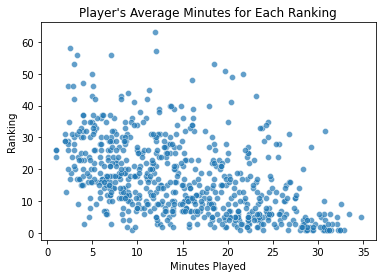

In [63]:
sns.scatterplot( x=df.minutes_played, y=df.overall_pick, alpha=0.7 );
plt.title("Player's Average Minutes for Each Ranking");
plt.xlabel("Minutes Played");
plt.ylabel("Ranking");

2. Plot each team's average points from the players on a bar chart. (teams on the horizontal axis and points on the verticle)

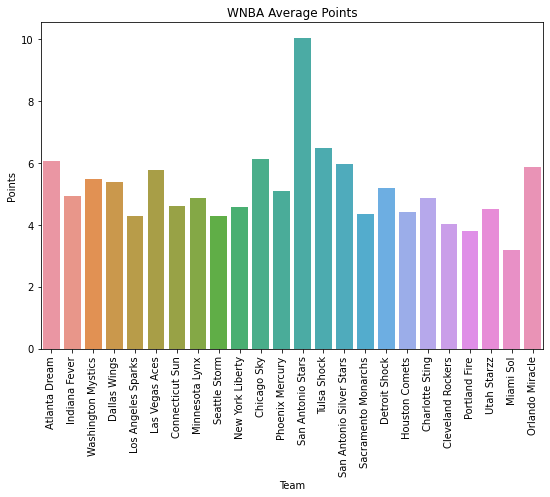

In [64]:
f, ax = plt.subplots(figsize=(9, 6))
sns.barplot(x= df.team, y= df.points, ci=None);
locs, labels = plt.xticks();
plt.setp(labels, rotation=90);
plt.title("WNBA Average Points");
plt.xlabel("Team");
plt.ylabel("Points");

3. Plot the total rebounds from the players from the New York Liberties and the Los Angeles Sparks on a line chart. (years on the horizontal and rebounds on the verticle)

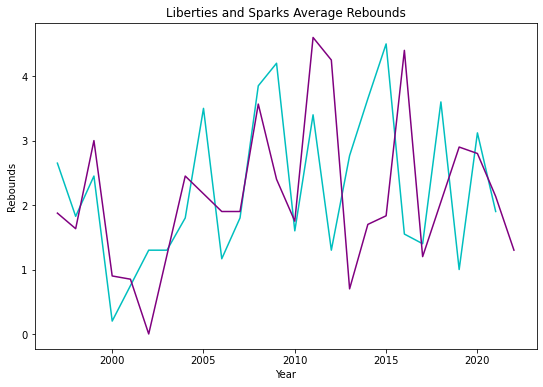

In [65]:
f, ax = plt.subplots(figsize=(9, 6))
liberty = df[ df.team == "New York Liberty" ]
sparks = df[ df.team == "Los Angeles Sparks" ]
sns.lineplot(x= df.year, y= liberty.total_rebounds, ci=None, color="c");
sns.lineplot(x= df.year, y= sparks.total_rebounds, ci=None, color="purple");
plt.title("Liberties and Sparks Average Rebounds");
plt.xlabel("Year");
plt.ylabel("Rebounds");

4. Plot each teams' average points (greater than 5 points) from the players from 2019.

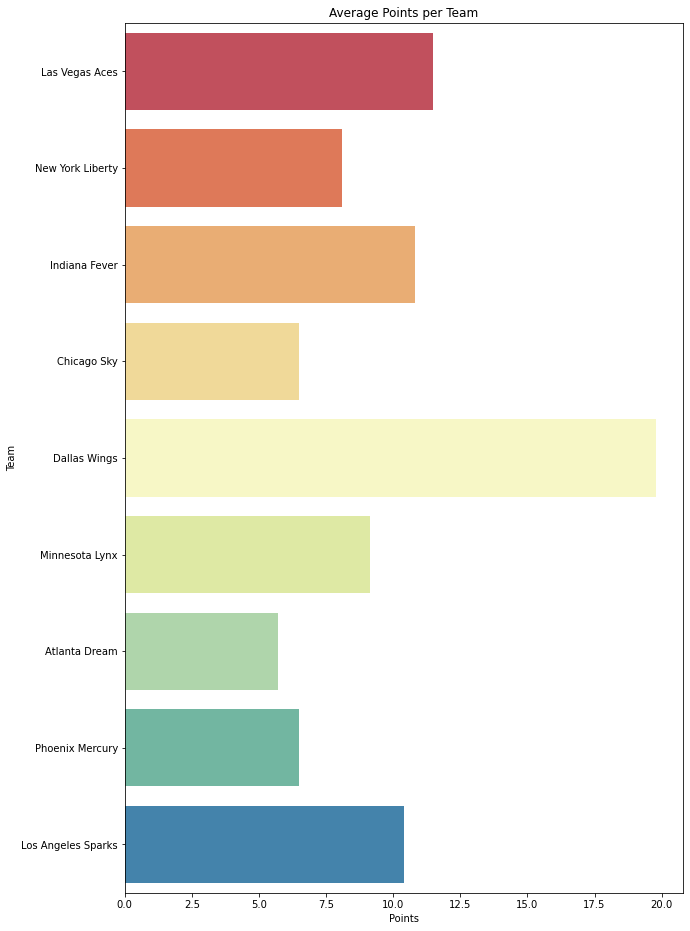

In [66]:
twenty_nineteen = df[ (df.year == 2019) & (df.points >= 5) ]

plt.figure(figsize=(10, 16))

sns.barplot(x='points', y='team', data=twenty_nineteen, orient='h', ci=None, palette="Spectral");
plt.xlabel("Points");
plt.ylabel('Team');
plt.title('Average Points per Team');
